___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential #paso x paso
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])#solo en clasificación es accuracy, mientras más positivo, mejor

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9739 - accuracy: 0.3613
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9447 - accuracy: 0.3743
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 0.9174 - accuracy: 0.3836
Epoch 4/200
6/6 [==============================] - 0s 833us/step - loss: 0.8933 - accuracy: 0.3855
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8708 - accuracy: 0.4041
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.4209
Epoch 7/200
6/6 [==============================] - 0s 484us/step - loss: 0.8285 - accuracy: 0.4320
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8095 - accuracy: 0.4451
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.4507
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7754 - accuracy: 0.4693
Epoch 11/200
6/6 [=======

6/6 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7672
Epoch 85/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7672
Epoch 86/200
6/6 [==============================] - 0s 599us/step - loss: 0.4829 - accuracy: 0.7691
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7691
Epoch 88/200
6/6 [==============================] - 0s 910us/step - loss: 0.4817 - accuracy: 0.7728
Epoch 89/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.7728
Epoch 90/200
6/6 [==============================] - 0s 480us/step - loss: 0.4805 - accuracy: 0.7747
Epoch 91/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7765
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7765
Epoch 93/200
6/6 [==============================] - 0s 0s/step - loss: 0.4787 - accuracy: 0.7765
Epoch 94/200
6/6 [==========

6/6 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.7952
Epoch 167/200
6/6 [==============================] - 0s 0s/step - loss: 0.4578 - accuracy: 0.7952
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7952
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.7952
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.7952
Epoch 171/200
6/6 [==============================] - 0s 0s/step - loss: 0.4574 - accuracy: 0.7952
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7952
Epoch 173/200
6/6 [==============================] - 0s 702us/step - loss: 0.4571 - accuracy: 0.7952
Epoch 174/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7933
Epoch 175/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.7933
Epoch 176/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

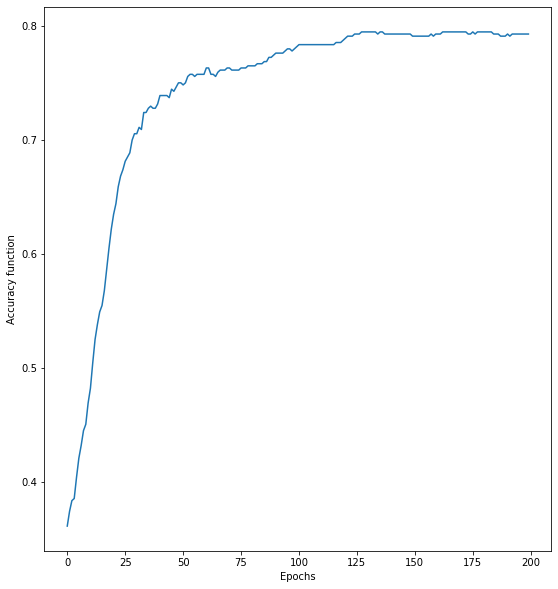

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
x_nueva_persona= [6,45,242,2452]# lo metemos en el model predict
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 828us/step


In [10]:
Y_pred

array([[0.24473323],
       [0.15233536],
       [0.1326924 ],
       [0.172815  ],
       [0.5218854 ],
       [0.4247325 ],
       [0.0512966 ],
       [0.6081912 ],
       [0.57781893],
       [0.76543915],
       [0.20744245],
       [0.82452303],
       [0.3812879 ],
       [0.32111782],
       [0.10205744],
       [0.43736362],
       [0.12342057],
       [0.08566181],
       [0.87936985],
       [0.6498193 ],
       [0.1825951 ],
       [0.06546394],
       [0.43826944],
       [0.09101782],
       [0.5689663 ],
       [0.8398418 ],
       [0.11571562],
       [0.05826442],
       [0.2579674 ],
       [0.10247927],
       [0.80046904],
       [0.78391814],
       [0.7943693 ],
       [0.838156  ],
       [0.605633  ],
       [0.73739344],
       [0.7011808 ],
       [0.2668799 ],
       [0.4481573 ],
       [0.68253314],
       [0.08372971],
       [0.54545534],
       [0.5383564 ],
       [0.33067724],
       [0.06649006],
       [0.61601096],
       [0.6127112 ],
       [0.189

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.793 	 0.755 	 0.606
  Test 	 0.745 	 0.633 	 0.625


### La más importante es **TEST**

**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = np_utils.to_categorical(Y).astype(int)

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [20]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\tatob\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 155ms/step - loss: 3.9565 - accuracy: 0.3083 - val_loss: 3.1532 - val_accuracy: 0.3667
Epoch 2/200
2/2 [==============================] - 0s 16ms/step - loss: 3.0019 - accuracy: 0.3250 - val_loss: 0.9880 - val_accuracy: 0.6000
Epoch 3/200
2/2 [==============================] - 0s 23ms/step - loss: 0.9990 - accuracy: 0.5583 - val_loss: 1.1282 - val_accuracy: 0.3333
Epoch 4/200
2/2 [==============================] - 0s 15ms/step - loss: 1.1133 - accuracy: 0.3333 - val_loss: 1.1053 - val_accuracy: 0.3333
Epoch 5/200
2/2 [==============================] - 0s 31ms/step - loss: 1.0786 - accuracy: 0.3500 - val_loss: 0.8495 - val_accuracy: 0.6667
Epoch 6/200
2/2 [==============================] - 0s 27ms/step - loss: 0.8885 - accuracy: 0.6333 - val_loss: 0.7567 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 18ms/step - loss: 0.7777 - accuracy: 0.6583 - val_loss: 0.7438 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 17ms/step - loss: 0.2742 - accuracy: 0.9000 - val_loss: 0.2060 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 29ms/step - loss: 0.2271 - accuracy: 0.9500 - val_loss: 0.2064 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2229 - accuracy: 0.9583 - val_loss: 0.2100 - val_accuracy: 1.0000
Epoch 62/200
2/2 [==============================] - 0s 16ms/step - loss: 0.2224 - accuracy: 0.9500 - val_loss: 0.2144 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2268 - accuracy: 0.9667 - val_loss: 0.2009 - val_accuracy: 1.0000
Epoch 64/200
2/2 [==============================] - 0s 23ms/step - loss: 0.2171 - accuracy: 0.9583 - val_loss: 0.1943 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 0s 17ms/step - loss: 0.2136 - accuracy: 0.9583 - val_loss: 0.2034 - val_accuracy: 1.0000
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 20ms/step - loss: 0.1540 - accuracy: 0.9750 - val_loss: 0.1827 - val_accuracy: 0.9333
Epoch 118/200
2/2 [==============================] - 0s 13ms/step - loss: 0.1935 - accuracy: 0.9417 - val_loss: 0.1422 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 20ms/step - loss: 0.1530 - accuracy: 0.9500 - val_loss: 0.1481 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1612 - accuracy: 0.9667 - val_loss: 0.1373 - val_accuracy: 1.0000
Epoch 121/200
2/2 [==============================] - 0s 33ms/step - loss: 0.1485 - accuracy: 0.9750 - val_loss: 0.1394 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1501 - accuracy: 0.9750 - val_loss: 0.1377 - val_accuracy: 1.0000
Epoch 123/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1484 - accuracy: 0.9750 - val_loss: 0.1401 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 17ms/step - loss: 0.1337 - accuracy: 0.9667 - val_loss: 0.1112 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 19ms/step - loss: 0.1310 - accuracy: 0.9667 - val_loss: 0.1079 - val_accuracy: 1.0000
Epoch 177/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1210 - accuracy: 0.9667 - val_loss: 0.1198 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 34ms/step - loss: 0.1308 - accuracy: 0.9583 - val_loss: 0.1171 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 16ms/step - loss: 0.1409 - accuracy: 0.9500 - val_loss: 0.1007 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 30ms/step - loss: 0.1251 - accuracy: 0.9667 - val_loss: 0.1009 - val_accuracy: 1.0000
Epoch 181/200
2/2 [==============================] - 0s 21ms/step - loss: 0.1212 - accuracy: 0.9750 - val_loss: 0.1030 - val_accuracy: 1.0000
Epoch 

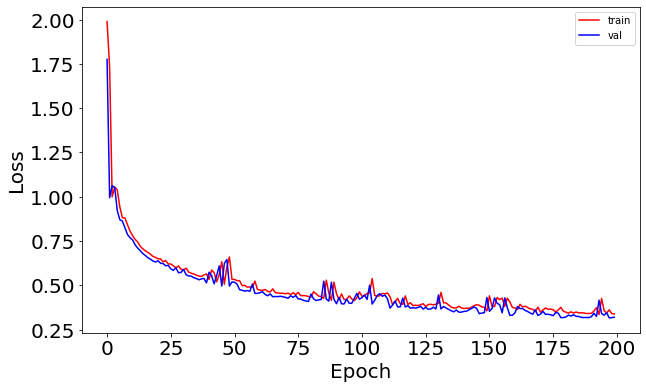

In [21]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [22]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 14ms/step


In [23]:
Y_pred

array([[9.7368238e-06, 9.1186339e-01, 8.8126816e-02],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [3.5548572e-21, 9.9920144e-04, 9.9900085e-01],
       [2.3208834e-06, 8.6885190e-01, 1.3114583e-01],
       [1.1196032e-05, 9.1531253e-01, 8.4676221e-02],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [3.8833734e-02, 9.5466727e-01, 6.4989068e-03],
       [2.8118754e-11, 2.1400201e-01, 7.8599805e-01],
       [9.5882456e-08, 7.1657598e-01, 2.8342399e-01],
       [5.0784769e-03, 9.8194134e-01, 1.2980150e-02],
       [3.6615466e-10, 3.4730062e-01, 6.5269941e-01],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [9.6089429e-01, 3.9071839e-02, 3.3875367e-05],
       [4.1216235e-06, 8.8782007e-01, 1.1217575e-01],
       [3.8897360e-16, 1.6640177e-02, 9.8335981e-01],
       [1.9156552e-03, 9.8035908e-01, 1.7725289e-02],
       [3.0704650e-06, 8.784

In [24]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [25]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [26]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [27]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 13ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.967 	 0.967
  Test 	 1.000 	 1.000 	 1.000
